In [612]:
import json
import networkx as nx
import netwulf as nw
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import ast
from itertools import product
from collections import Counter
import networkx as nx
import random
from wordcloud import WordCloud
from tqdm import tqdm
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
import csv
import time
from tqdm import tqdm
import os
from openai import OpenAI
import random


random.seed(42)

In [613]:
data_clean = pd.read_csv('data/df_clean_data_updated_comm_new1.csv', sep=";")

The text used for the text analysis were collected from web-scraping description of products of the [BilkaToGo](https://www.bilkatogo.dk/) website. The descriptions are a small text about a certain procuts typically explaining what the product tastes like, and what occasions/setting they are typically enjoyed in.  The website is tied to a database and the structure is heavily based on Javascript making the web-scraping a tideous and long process. However, with the help of the 'sellenium' python package, which interacts with the website, we were then able to webscrape the relevant text data. By looking at the website structure, we understood that the products are divided into categories e.g. 'Frugt og Grønt', 'Kød' etc. so we could control which products we would like to include in the analysis. This project focuses only on categories regarding food products.
Some products also have a description regarding the brand of the products which we leave out of the data-collection. 

These description vary a lot in length, from the shortest description length of just 1 word about [this wine bottle](https://www.bilkatogo.dk/produkt/montgras-ninquen/33560/) with just '.' when cleaning about the brand description and the longest description length of 325 words about [this bottle of rum](https://www.bilkatogo.dk/produkt/plantation-gylden-rom-double-aged-grande-reserve/72126/). 
The average word length of the descriptions are 57.56 words with a standard deviation of 17.55 and a median of 55. And if we take a look of the distribution of the word length of the product descriptions, we can see that it is normally distributed.

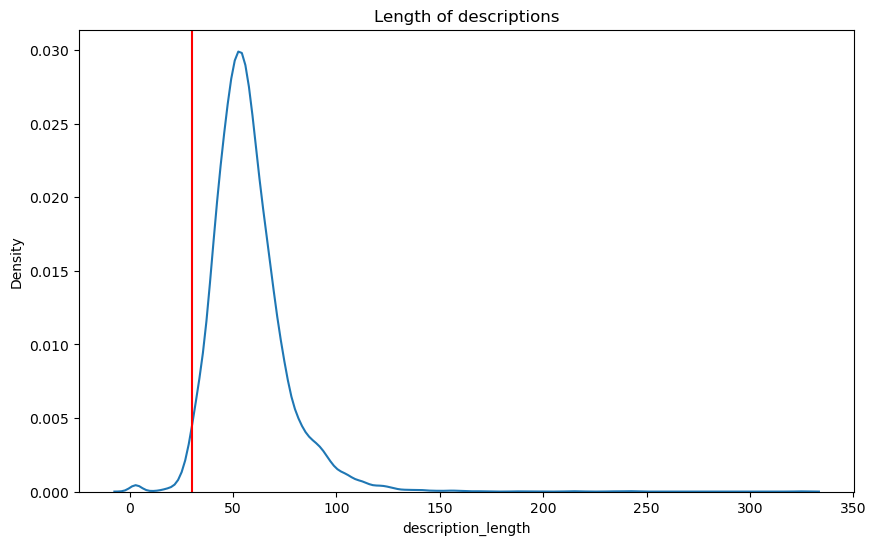

In order to adress the problem that very short descriptions like the one of the 1 word description of a wine bottle doesn't contain a lot of information of the product and is not usefull in a text analysis, we introduce a cut-off threshold. We introduce this threshold to ensure that only products with description longer than this threshold is included. 
The threshold is decided as a cut-off of the low end tail of the normal distribution at ≤30.  

When cutting of products with a product description of less that 30 words, 149 products are cut off from the data. This cut-off means that the new mean of the description lengths are 58.12 words with a standard deviation of 17.05 and median of 55.

When working with text analysis tools it is essential that we tokenize the text, such that we break the text into more managable pieces for NLP applications. This is done with nltk python package that can remove unwanted tokens such as danish stop words, punctuation etc. 
The distribution of the tokenized text can be seem below

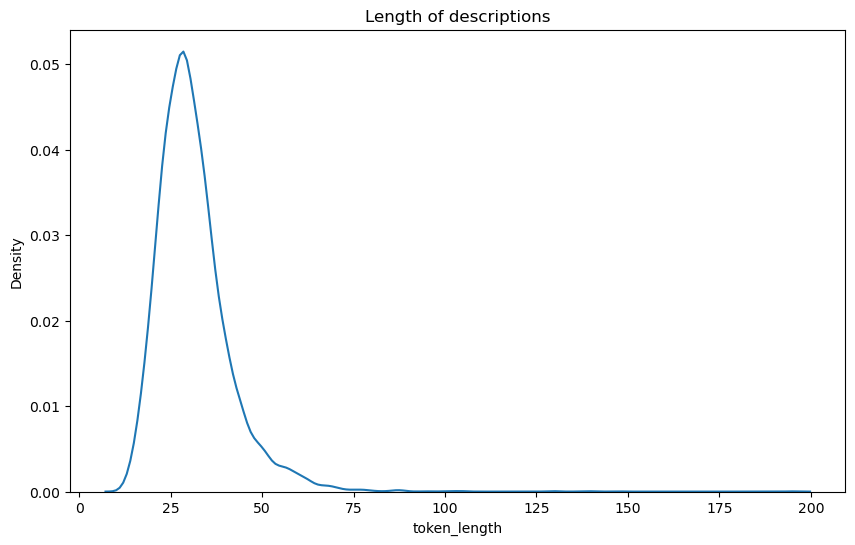

We note that it still has the same shape as a normal distribution. This distribution of tokenized descriptions has a mean of 31.28 a standard deviation of 10.03 and a median of 30. Which means that with tokenizing the text, the mean  of the desription length decreased by 27.

With this analysis, we would like to get an insight in the consumer buying patterns and we could get this insight by analysing the the words that characterize certain natural communities within the frequently-bought-together network. Here, we might get som insight in what makes products frequently bought together. In order to do this, we use the TF-IDF scores on the tokenized product descriptions.
These TF-IDF scores of words help us identify what words specifically are unique for each community.
The TF-IDF scores of words for the top 9 communities can be seen below:

<span style="color:red"> Indsæt table her </span>

We see some different patterns that we can associate from each other in each communities. We some clear ones in e.g. community 2 that has ecology, and community 3 which has a lot of top words that can make this community be interperated like a candy-like community with top words like 'mix', 'liquorice', 'milk-chocolate' etc. But to get a better overview of the top words within each community, let's look at the top TF-IDF words in word clouds for the top 9 communities:

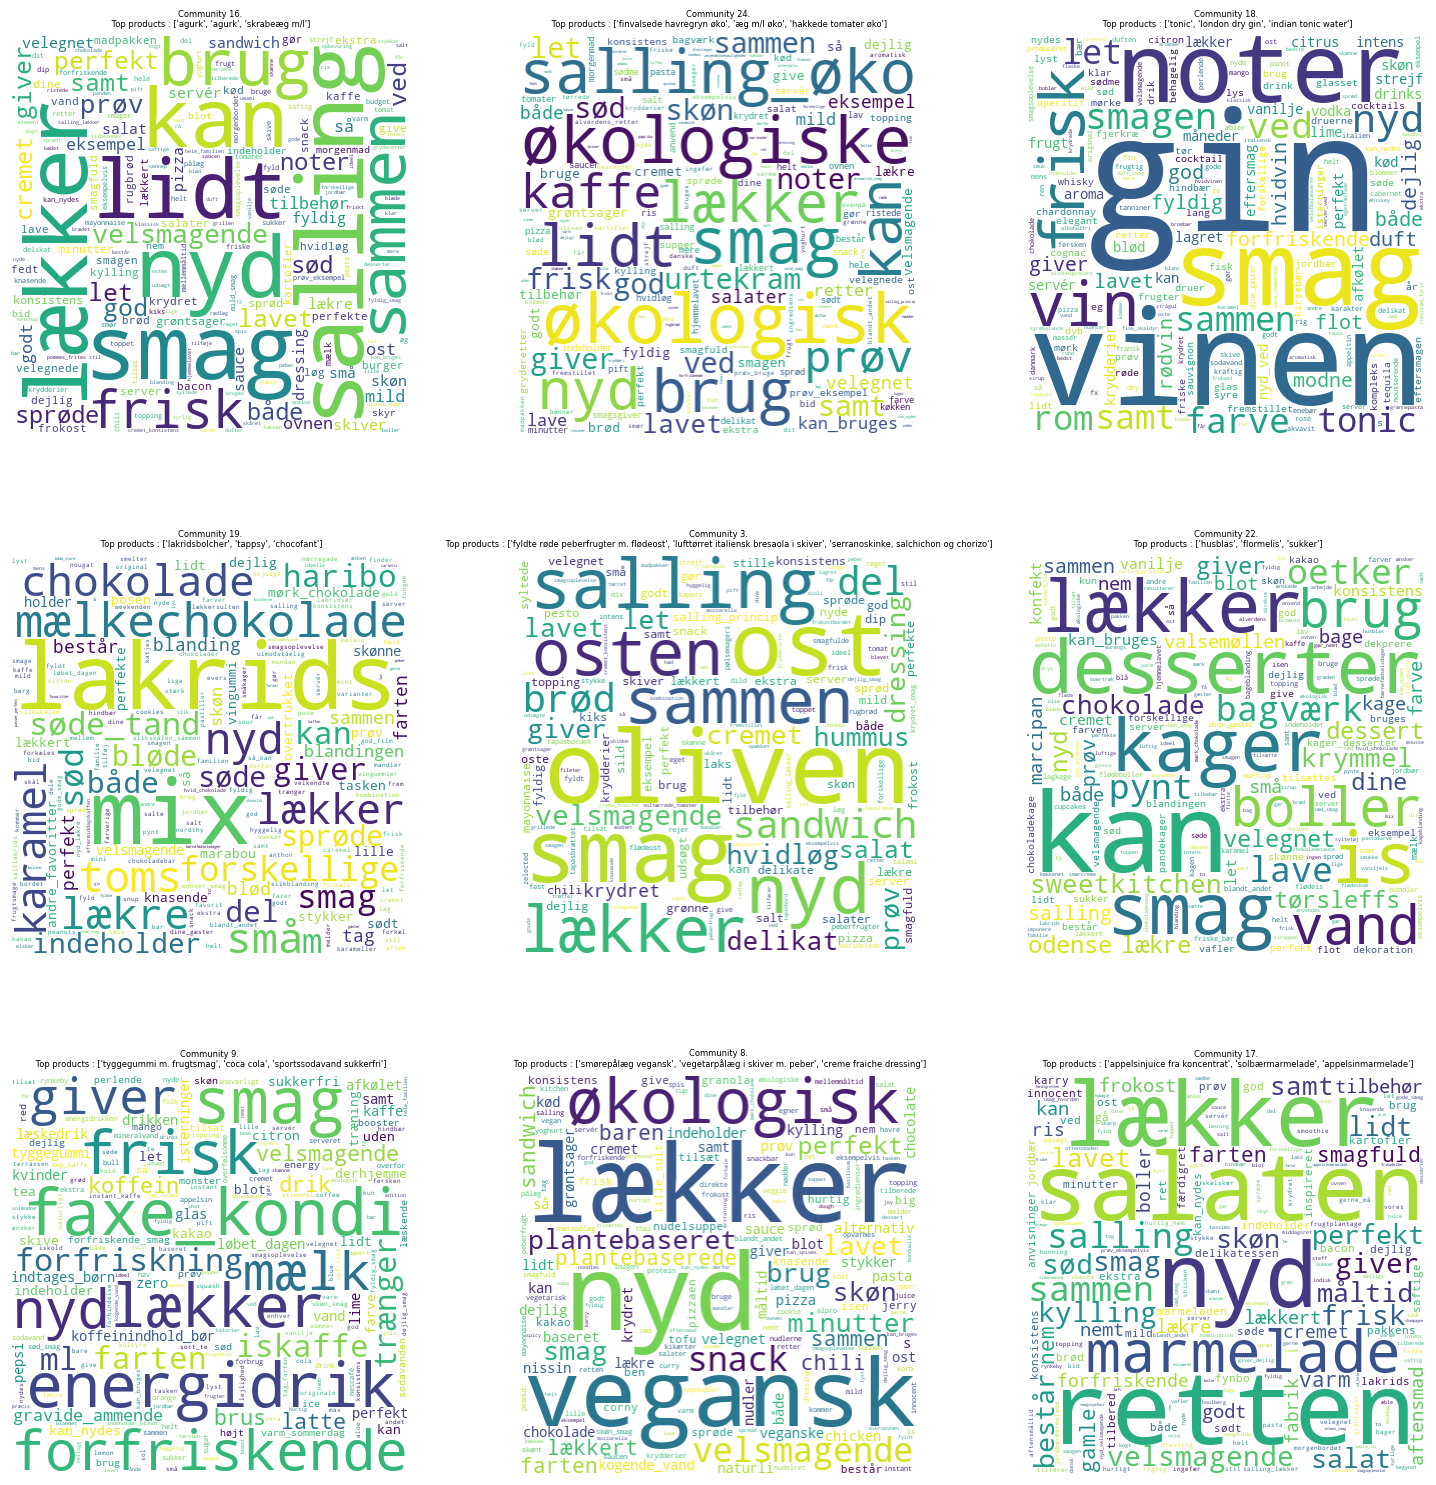

Here we can distinguish betwween the top 9 communities for the words that are specif for each community. Which makes us able to pinpoint each buying pattern when visiting a Salling store. To further help with the distinguishing of each community we made an API call for chatGPT 3.5 to classify each community based on the top 100 TF-IDF words for that specific community. The classifications for each community are:


1. Community 16: 'Everyday'
> This community's top TF-IDF words include: 'Salling', 'Delicious', 'taste', 'enjoy', 'together'. This makes sense that this is the biggest community within the frequently-bought-together network, as when a consumer buys food, they usually buys in bulk in mealplans for the whole week, and [this study](https://ijbnpa.biomedcentral.com/articles/10.1186/s12966-017-0461-7) showed that atleast 57% of families buy after weekly mealplans (across the US). This means that atleast the majority buy a lot of diverse foods for the 'everyday' shopping, and is why this community is the largest. The products with the highest degrees within this community are two different brands of (agurk) cucumbers, and normal (skrabeæg) eggs, which makes sense as these products are used in a lot of different dishes.

2. Community 24: 'Organic'
> This community's top TF-IDF words include: 'Salling', 'Ecological', 'Taste', 'Cofee'. This community represents a lot of what community 16 does of everyday bought items, but include ecological items. This community makes sense, as it is still the same reasoning with consumers buying for mealplans, but people who buy some ecological items, tend to buy all ecological items together, you can read more about the assortativity analysis in the explainer notebook. The products with the highest degrees in this community is eco oatmeal, eco eggs, and eco tomato.

3. Community 18: 'Beverages'
> This community's top TF-IDF words include: 'Gin', 'Wine', 'notes', 'taste'. This community describes a consumer buying drinks or wine for a maybe a night with guests, indicated by one of the top words 'Together' that would indicate that the drinks are to be enjoyed with company. This community is also large because when buying drinks consumers tend to buy things together because drinks are a comibnation of different products mixed together. Hence, why the word 'Gin' is the largest in the wordcloud, as Gin & Tonic is a very common drink especially in denmark. This is further shown by the top 3 products with higest degree in this community which is two types of tonic water and London dry gin.

4. Community 19: 'Indulgence'
> This community's top TF-IDF words include: 'liquorice', 'Mix', 'Milkchocolate', 'Chocolate'. This is the 4th largest community in the network, and makes sense because shops put Candy and other indulgences together in the same spot, and together with the urge of eating a lot of sugary stuff for a movienight or party, makes the indulgence community rather large. The top products in this community are 'liquorice hard candy', 'tappsy' and 'chocofants'.

5. Community 3: 'Gourmet' / 'Tapas'
> This community was classified as 'Gourmet' but we thought that 'Tapas' was a more fitting category for this community. This community's top TF-IDF words include: 'Olives', 'Cheese', 'Taste' and 'delicious'. This community is less large as it is more of a niche category. But for tapas certain things are tend to be bought together like the top frequently-bought-together items in this community: 'Bell pepper', 'Italian bresaola', and 'italian serrano ham'.

6. Community 22: 'Baking' 
> This community's top TF-IDF words include: 'Desert', 'Cake', 'Oetker' and 'Delicious'. This community would be associated with a buying patterns of a consumer that wants to bake. This is shown by the top words in the community and 'Oetker' is a brand that is used for baking. These things are often bought together as you typically need specific things for a recipe when baking. This conclusion is further enforced when looking at the top products in this community which is 'powdered sugar', 'gelatin' and 'sugar'.

7. Community 9: 'Energy'
> This community's top TF-IDF words include: 'Energydrink', 'Faxe kondi', Rerfreshing'. This community is identified by the need of a refreshment or energy like some energy drink or soda. The reason why this community is rather large is that consumers typically buys refreshments to more people likes guests where people prefer different things to drink. A reason why it is not higher up in size, is that sometimes people just go to the supermarket to buy a single refreshment and not a lot of other products. The top products in this community include: 'Gum with fruit flavor', 'Coca Cola', and 'Sportsdrink'

8. Community 8: 'Vegan' 
> This community's top TF-IDF words include: 'Vegan', 'Delicious', 'Ecology' and 'Enjoy'. This community is distinguished by the vegan aspect. People who are vegan tend to buy other vegan and ecology groceries together. A reason for the not so large community here is that there are not such a vast selection of vegan foods in the grocery shops yet and vegan consumers usually only stick to buying vegan groceries and not other non-vegan products. The top products in this community are: 'vegan butter', 'vegan toppings' and 'creme fraiche dressing'.

9. Community 17: 'Healthy'
> This community's top TF-IDF words include: 'Salad', 'The dish', 'Enjoy'. This community is classified as a healthy community. Here a conclusion to this community would be that certain consumers buy very healthy products like salads and healthy juices as indicated by the word 'innocent' which is a type of brand for healthy juices. The top bought products in this community is: 'orange juice', blackcurrants- and orange marmelade.  

We set up a loop classifying each community based on the top 100 TF-IDF words with OpenAI's ChatGPT using their API to call the gpt-3.5-turbo model. with this we get a classification for each community in our network which can be seen below:

{16: 'Everyday',
 24: 'Organic',
 18: 'Beverages',
 19: 'Indulgence',
 3: 'Gourmet',
 22: 'Baking',
 9: 'Energy',
 8: 'Vegan',
 17: 'Healthy',
 4: 'Healthy',
 14: 'Italian',
 12: 'Asian',
 20: 'Cooking',
 11: 'Organic',
 6: 'Snacks',
 1: 'Beer',
 10: 'Snack',
 0: 'Convenience',
 21: 'Mexican',
 15: 'Tea',
 7: 'Indulgence',
 13: 'Meat',
 2: 'Coffee',
 5: 'Convenience',
 23: 'Coffee'}

This was done in order to label get an unbiased label on each community based on 100 words which that many words can be somewhat of a challenge to do for a human. Furthermore, we can quickly see in the products that link communities, which you can read more about in the network analysis about betweenness centrality, together what type of commmunities the products link together with a one word category.

In [614]:
dictionary1 = {16: 'Everyday', 24: 'Organic', 18: 'Beverages', 19: 'Indulgence', 3: 'Gourmet', 22: 'Baking', 9: 'Energy', 8: 'Vegan', 17: 'Organic', 4: 'Healthy', 14: 'Italian', 12: 'Asian', 20: 'Cooking', 11: 'Organic', 6: 'Snacks', 1: 'Beer', 10: 'Snacks', 0: 'Convenience', 21: 'Mexican', 15: 'Tea', 7: 'Indulgence', 13: 'Meat', 2: 'Coffee', 5: 'Everyday', 23: 'Coffee'}

c_dict = {'18364': {5, 10, 11, 16, 18, 20, 21, 22, 24}, '29439': {3, 4, 10, 11, 14, 16, 18, 19, 21, 22, 24}, '19721': {5, 7, 10, 13, 14, 16, 18, 19, 21, 22, 24}, '39353': {11, 16, 17, 22, 24}, '61090': {4, 11, 16, 18, 20, 24}, '53366': {3, 8, 11, 16, 20, 22, 24}, '39411': {11, 16, 18, 24}, '53365': {3, 9, 10, 16, 17, 18, 22, 24}, '41860': {3, 4, 9, 11, 16, 18, 19, 21, 22, 24}, '82376': {10, 14, 16, 18, 22, 24}, '18381': {4, 6, 11, 12, 16, 17, 18, 21, 24}, '119482': {16, 24}, '72008': {4, 11, 16, 17, 18, 24}, '51061': {5, 12, 16, 18, 22, 24}, '71507': {2, 3, 6, 8, 16, 18, 19, 24}}

# Replace integers with corresponding values from dictionary1 while maintaining order
c_dict_with_strings = {key: [dictionary1[item] for item in sorted(value)] for key, value in c_dict.items()}
new_dict_with_names = {data_clean[data_clean['product_id'] == int(key)]['name'].iloc[0]: value for key, value in c_dict_with_strings.items()}

print(new_dict_with_names)

# Convert dictionary to DataFrame
df = pd.DataFrame.from_dict(new_dict_with_names, orient='index')
df = df.map(lambda x: '' if x is None else x)

df

{'agurk': ['Gourmet', 'Healthy', 'Snacks', 'Organic', 'Italian', 'Everyday', 'Beverages', 'Indulgence', 'Mexican', 'Baking', 'Organic'], 'smørbar': ['Everyday', 'Indulgence', 'Snacks', 'Meat', 'Italian', 'Everyday', 'Beverages', 'Indulgence', 'Mexican', 'Baking', 'Organic'], 'mørk pålægschokolade 53% kakao øko': ['Organic', 'Everyday', 'Organic', 'Baking', 'Organic'], 'agurk øko': ['Healthy', 'Organic', 'Everyday', 'Beverages', 'Cooking', 'Organic'], 'æg m/l øko': ['Gourmet', 'Vegan', 'Organic', 'Everyday', 'Cooking', 'Baking', 'Organic'], 'finvalsede havregryn øko': ['Organic', 'Everyday', 'Beverages', 'Organic'], 'skrabeæg m/l': ['Gourmet', 'Energy', 'Snacks', 'Everyday', 'Organic', 'Beverages', 'Baking', 'Organic'], 'remoulade øko': ['Gourmet', 'Healthy', 'Energy', 'Organic', 'Everyday', 'Beverages', 'Indulgence', 'Mexican', 'Baking', 'Organic'], 'hvedemel øko': ['Snacks', 'Italian', 'Everyday', 'Beverages', 'Baking', 'Organic'], 'bananer': ['Healthy', 'Snacks', 'Organic', 'Asian', 

,0,1,2,3,4,5,6,7,8,9,10
agurk,Gourmet,Healthy,Snacks,Organic,Italian,Everyday,Beverages,Indulgence,Mexican,Baking,Organic
smørbar,Everyday,Indulgence,Snacks,Meat,Italian,Everyday,Beverages,Indulgence,Mexican,Baking,Organic
mørk pålægschokolade 53% kakao øko,Organic,Everyday,Organic,Baking,Organic,,,,,,
agurk øko,Healthy,Organic,Everyday,Beverages,Cooking,Organic,,,,,
æg m/l øko,Gourmet,Vegan,Organic,Everyday,Cooking,Baking,Organic,,,,
finvalsede havregryn øko,Organic,Everyday,Beverages,Organic,,,,,,,
skrabeæg m/l,Gourmet,Energy,Snacks,Everyday,Organic,Beverages,Baking,Organic,,,
remoulade øko,Gourmet,Healthy,Energy,Organic,Everyday,Beverages,Indulgence,Mexican,Baking,Organic,
hvedemel øko,Snacks,Italian,Everyday,Beverages,Baking,Organic,,,,,
bananer,Healthy,Snacks,Organic,Asian,Everyday,Organic,Beverages,Mexican,Organic,,


The dataframe is sorted such that the products on the left, are ordered from highest betweenness centrality to lowest of the top 15 highest betweenness centrality in the entire frequently-bought-together network.

<span style="color:red"> Indsæt text om dataframe her </span>

In [615]:
def preprocess_text(tokens):
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer
    porter = PorterStemmer()
    stop_words = set(stopwords.words('danish'))

    tokens = [w.lower() for w in tokens if w.isalpha()]
    tokens = [w for w in tokens if not w in stop_words]
    #tokens = [porter.stem(word=t, to_lowercase=False) for t in tokens]
    
    tokens = [token for token in tokens if token.strip()]
    
    
    return tokens

In [616]:
from nltk.tokenize import word_tokenize, sent_tokenize

data_clean['Tokens'] = data_clean['descriptions'].apply(word_tokenize).apply(preprocess_text)
token_list = data_clean['Tokens']

data_clean['token_length'] = data_clean['Tokens'].apply(len) #length

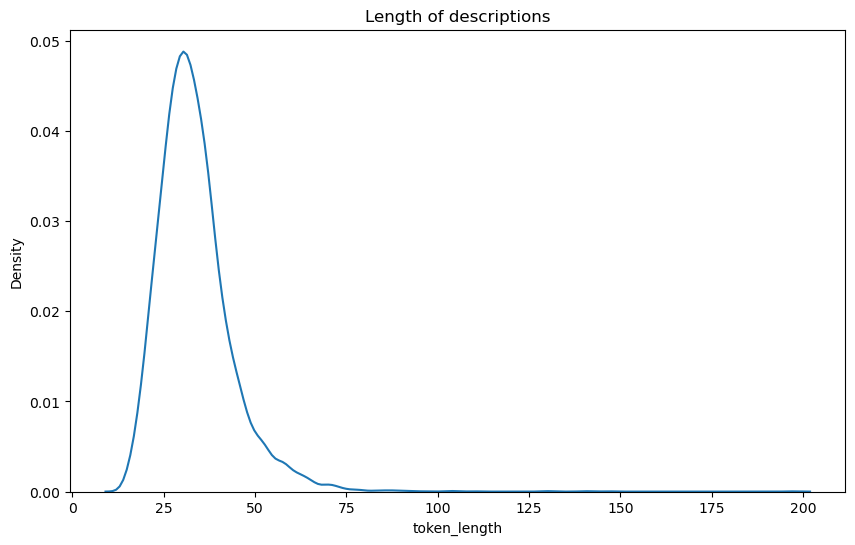

In [617]:
#plot the length of the descriptions for the products
plt.figure(figsize=(10,6))
sns.kdeplot(data_clean['token_length'])
plt.title('Length of descriptions')
plt.show()

In [618]:
from itertools import chain
comprehensive_token_list = list(chain(*[token_list[idx] for idx in token_list.index]))

In [619]:
from collections import Counter
def sort_by_most_appearing(strings):
    # Count occurrences of each string
    counts = Counter(strings)
    
    # Sort the list based on the counts
    sorted_strings = sorted(strings, key=lambda x: counts[x], reverse=True)
    
    return sorted_strings
sorted_comprehensive_token_list = sort_by_most_appearing(comprehensive_token_list)

In [620]:
from tqdm import tqdm
amount_of_words = len(Counter(comprehensive_token_list).most_common())
word_count_list = Counter(comprehensive_token_list).most_common()
word_count = [word_count_list[i][1] for i in tqdm(range(amount_of_words))]

100%|██████████| 19390/19390 [00:00<00:00, 1417473.72it/s]


In [621]:
def plot_frequency_rank(word_count, amount_of_words):
    # Sort the words based on their frequencies
    
    # Get ranks and frequencies
    ranks = list(range(1, amount_of_words + 1))
    frequencies = word_count
    
    # Plot
    plt.figure(figsize=(10, 6))
    plt.plot(ranks, frequencies, marker='o', linestyle='-')
    plt.title('Frequency-Rank Plot')
    plt.xlabel('Rank')
    plt.ylabel('Frequency')
    plt.xscale('log')  # Use logarithmic scale for better visualization
    plt.yscale('log')
    plt.grid(True)
    plt.show()


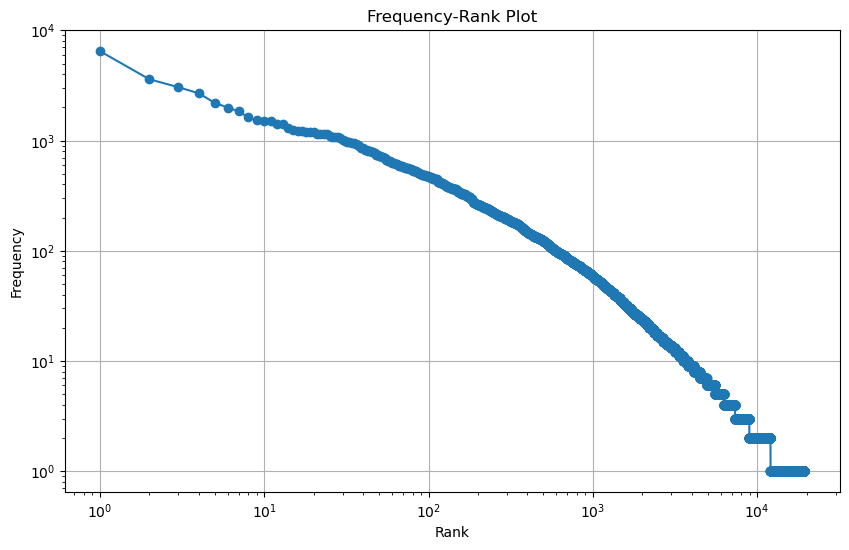

In [622]:
plot_frequency_rank(word_count, amount_of_words)

In [623]:
# Define a function to extract tokens and concatenate them for each community
def concatenate_tokens(group):
    tokens_list = group['Tokens'].explode().tolist() #should be list of strings
    return tokens_list


# Group by community and apply the function to concatenate tokens
community_tokens = data_clean.groupby('community').apply(concatenate_tokens)


# Reset index to convert the groupby result back to a DataFrame
community_tokens = community_tokens.reset_index(name='Tokens')

community_tokens.head()

/var/folders/vg/smyn0xpj4txbs4bxknnvc4zw0000gn/T/ipykernel_86475/3678766654.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  community_tokens = data_clean.groupby('community').apply(concatenate_tokens)


,community,Tokens
0,0,"[fransk, postej, stryhn, finhakket, postej, cremet, konsistens, blød, afrundet, smag, velsmagende, postej, stryhn, både, nemt, hurtigt, lave, lækker, mad, frokost, børnenes, madpakke, nyd, franske, postej, præcis, top, skrive, agurk, syltede, røderbeder, friskrevet, peberrod, prøv, lune, ved, grader, ovnen, brunchæg, dava, skrabeæg, størrelse, æg, adskillige, anvendelsesmuligheder, kan, både, koges, steges, pocheret, prøv, bruge, brunchæg, lave, blødkogte, æg, scrambled, eggs, bacon, så, virkelig, kan, forkæle, dine, gæster, brunch, brunchbordet, endnu, mere, overdådigt, kan, bruge, æggene, lave, lækre, luftige, amerikanske, pandekager, mini, salami, böklunder, børnevenlig, salami, mild, pepperoni, smag, lille, salami, kommer, praktisk, indpakning, ideel, lille, overraskelse, børnenes, madpakker, trænger, lille, snack, løbet, ...]"
1,1,"[rejer, nordatlanten, lage, royal, arctic, lækker, delikat, ret, lavet, friske, saftige, rejer, kolde, rene, farvande, nordatlanten, rejerne, forsigtigt, kogt, derefter, marineret, lage, giver, dejlig, rund, smag, rejerne, server, rejerne, lækker, forret, let, lækkert, måltid, sammen, stykke, brød, lidt, smør, yakima, ipa, jacobsen, lys, gylden, farve, eksotisk, duft, tropiske, frugter, melon, grapefrugt, papaya, smagen, frisk, fyldig, lang, efterbitterhed, nyd, yakima, ipa, drik, federe, madretter, engelsk, smørstegte, fiskeretter, barbecue, double, ambrée, grimbergen, belgisk, øl, smuk, kobbergylden, farve, råhvidt, skum, toppen, øllen, dufter, fyldigt, frugtige, noter, modne, pærer, vanilje, anis, strejf, mørkt, sukker, karamel, smagen, sødlig, afstemt, velafbalanceret, bitterhed, blød, fylde, let, brændt, ...]"
2,2,"[danbo, skæreost, salling, lækker, mild, ost, ideel, enhver, lejlighed, skær, skiver, brug, ostebordet, sandwich, del, lækker, snack, lagrede, ost, intens, smag, fast, konsistens, gør, nem, arbejde, prøv, danbo, skæreost, salling, skab, lækreste, retter, druerne, kommer, stokke, år, gamle, betyder, giver, lavt, udbytte, gengæld, får, fyldig, vin, masser, solmoden, sødmefyldt, frugt, smag, duft, lagring, blanding, amerikanske, franske, egefade, får, flot, rubinrød, vin, super, kompetent, kraftige, retter, grill, and, gås, gryderetter, dyrevildt, drikker, rødvin, krydret, mexicansk, mad, får, ekstra, oplevelse, vin, server, ved, pinot, noir, gnarly, head, vin, dyrkes, ældste, vinstokke, californien, vilde, vinstokke, producerer, druer, fyldige, smagsnuancer, blomme, svampe, mokka, efterfulgt, ...]"
3,3,"[dadler, tørrede, frugter, dadelpalmen, farven, ovale, frugt, varierer, gylden, rødbrun, smagen, sødlig, dadler, kan, anvendes, masse, formål, prøv, eksempelvis, snack, salat, dessert, ost, mysli, bagværk, brug, lave, julekonfekt, ved, dyppe, lag, smeltet, chokolade, drysse, fint, krymmel, revet, peberrod, smager, sødligt, lige, inden, begynder, brænde, skarp, karakteristisk, smag, intens, sennep, duften, intens, stikkende, nuancer, sennep, anelse, peberrod, indgår, hovedingrediens, peberrodssalat, roastbeef, form, peberrodscreme, tilbehør, mørbrad, hakkebøf, laks, revet, peberrod, kan, anvendes, topping, bønnepostej, rødbede, peberrod, opbevares, køl, fintrevet, peberrod, smager, sødligt, lige, inden, begynder, brænde, skarp, karakteristisk, smag, intens, sennep, duften, intens, stikkende, nuancer, sennep, anelse, peberrod, indgår, hovedingrediens, peberrodssalat, roastbeef, ...]"
4,4,"[nordisk, coleslaw, salling, knasende, blanding, snittet, hvidkål, rødkål, grønkål, gulerod, inspireret, nordiske, køkken, indeholder, søde, milde, friske, let, bitre, smage, dufte, skøn, forening, forskellige, coleslawblandingen, skyllet, så, lige, klar, spise, servér, eksempel, lækkert, tilbehør, saftig, hakkebøf, glinsende, bløde, løg, lever, gris, skiver, slagteren, stammer, grisens, indmad, skiveskåret, svinelever, praktisk, laves, lækker, hjemmelavet, leverpostej, svinelever, går, godt, andre, ingredienser, lidt, kant, mild, hindbær, fedt, arla, frisk, smag, hindbær, bet

In [624]:
#print some insights
for i in range(10):
    c = community_tokens['community'][i]
    print(f"for community {c} we have the following number of tokens: {len(community_tokens['Tokens'][i])}")


for community 0 we have the following number of tokens: 5847
for community 1 we have the following number of tokens: 7360
for community 2 we have the following number of tokens: 2516
for community 3 we have the following number of tokens: 19169
for community 4 we have the following number of tokens: 8706
for community 5 we have the following number of tokens: 2262
for community 6 we have the following number of tokens: 6745
for community 7 we have the following number of tokens: 3789
for community 8 we have the following number of tokens: 10335
for community 9 we have the following number of tokens: 12067


In [625]:
#the top 5 communities
top_5_communities = data_clean['community'].value_counts().nlargest(5).index.tolist()

#for each top 5 community, print the top 5 most common tokens
for community in top_5_communities:
    print("-----------------------------------------------------------------------")
    print(f"Community {community}")
    print("-----------------------------------------------------------------------")
    tokens = community_tokens["Tokens"][community_tokens["community"] == community].explode().tolist()
    tokens_series = pd.Series(tokens)
    print(f"The top 5 most common tokens in community {community} by the TF are:")
    print(tokens_series.value_counts().nlargest(5)/len(tokens_series)) # Normalized by the total number of tokens in the community
    print("\n")

-----------------------------------------------------------------------
Community 16
-----------------------------------------------------------------------
The top 5 most common tokens in community 16 by the TF are:
smag       0.021054
kan        0.012403
salling    0.010882
lækker     0.010172
prøv       0.008736
Name: count, dtype: float64


-----------------------------------------------------------------------
Community 24
-----------------------------------------------------------------------
The top 5 most common tokens in community 24 by the TF are:
smag         0.019813
økologisk    0.015192
kan          0.012280
salling      0.009115
prøv         0.009073
Name: count, dtype: float64


-----------------------------------------------------------------------
Community 18
-----------------------------------------------------------------------
The top 5 most common tokens in community 18 by the TF are:
smag     0.016767
nyd      0.011142
noter    0.008675
ved      0.008649
vinen  

In [626]:
idf_scores = {}
for c in top_5_communities: # Loop over 5 largest communities
    #Get all Work-ids for the works written by community members
    Works = list(data_clean.loc[data_clean["community"] == c, "product_id"])  

    # Retrieve all tokens used throughout the abstracts tied to authors from the community
    community_tokens = []
    token_doc_frequency = Counter()
    for idx, work in enumerate(Works):

        tokens = list(data_clean.loc[data_clean["product_id"] == work, "Tokens"])[0]
        token_doc_frequency.update(set(tokens))
    

    # Calculate IDF score based on the df of the individual tokens 
    idf_scores[c] = {}
    for token, freq in token_doc_frequency.items():
        idf_scores[c][token] = np.log(len(Works) / freq)

# Plot the top 5 IDF words along with their score for each community
for c in top_5_communities:
    print("-----------------------------------------------------------------------")
    print("Community:", c)
    print("-----------------------------------------------------------------------")
    print(f"The top 5 tokens in community {c} by the IDF are:")
    top_idf_scores = sorted(idf_scores[c].items(), key=lambda x: x[1], reverse=True)[:5]
    
    for token, score in top_idf_scores:
        data = [token, score]
        print('{:<12s}{:>15.7f}'.format(data[0],data[1]))
    print("\n")


-----------------------------------------------------------------------
Community: 16
-----------------------------------------------------------------------
The top 5 tokens in community 16 by the IDF are:
basisgrøntsag      7.4627892
græsgrønne        7.4627892
grundingrediens      7.4627892
flået             7.4627892
skindets          7.4627892


-----------------------------------------------------------------------
Community: 24
-----------------------------------------------------------------------
The top 5 tokens in community 24 by the IDF are:
cherry            7.2203738
aflange           7.2203738
basisgrøntsag      7.2203738
græsgrønne        7.2203738
grundingrediens      7.2203738


-----------------------------------------------------------------------
Community: 18
-----------------------------------------------------------------------
The top 5 tokens in community 18 by the IDF are:
limeskallen       6.8543545
fromager          6.8543545
marinere          6.8543545
riv

In [627]:
Top_9_communities = list(data_clean['community'].value_counts().nlargest(9).index)
TF_IDF = {}
data_product = pd.read_csv('data/df_clean_data_updated_comm_new1.csv', sep=";")
TF = {}
top_authors = {}

for c in Top_9_communities:
    #Calculate token frequency within a community.
    Works = list(data_clean.loc[data_clean["community"] == c, "product_id"])

    token_doc_frequency = Counter()
    token_term_frequency = Counter()
    for idx, work in enumerate(Works):
        tokens = list(data_clean.loc[data_clean["product_id"] == work, "Tokens"])[0]
        token_doc_frequency.update(set(tokens))
        token_term_frequency.update(tokens)
        

    # Calculate IDF and TF-IDF scores for the top 9 largest communities
    TF_IDF[c] = {}
    TF[c] = {}
    for token, freq  in token_term_frequency.items():
        TF[c][token] = freq / token_term_frequency.total()
    
    for token, freq  in token_doc_frequency.items():
        idf = np.log(idx / freq)
        TF_IDF[c][token] = TF[c][token] * idf
        
    # Top 10 TF words in the community
    top_tf_scores = sorted(TF[c].items(), key=lambda x: x[1], reverse=True)[:10]
    print("-----------------------------------------------------------------------")
    print("Community", c, "top 10 TF words:")
    print("-----------------------------------------------------------------------")
    for token, score in top_tf_scores:
        print(token, score)
    #print("-----------------------------------------------------------------------")
    
    # Top 10 TF-IDF words in the community
    top_TF_IDF = sorted(TF_IDF[c].items(), key=lambda x: x[1], reverse=True)[:20]
    print("-----------------------------------------------------------------------")
    print("Community", c, "top 10 TF-IDF words:")
    print("-----------------------------------------------------------------------")
    for token, score in top_TF_IDF:
        print(token, score)
    

    #Top 3 authors within community
    authors = data_product.loc[data_product['community']==c].sort_values(by=['degree'], ascending = False)
    
    top_authors[c] = authors.product_id.unique()[:3]
    print("-----------------------------------------------------------------------")
    print(f'Top 3 authors in this community {c} is :')
    print("-----------------------------------------------------------------------")
    print([list(data_product.loc[data_product['product_id']==top_authors[c][i]].name)[0] for i in range(3)])
    print('\n')
    
    

-----------------------------------------------------------------------
Community 16 top 10 TF words:
-----------------------------------------------------------------------
smag 0.021054054510738242
kan 0.012402629222216589
salling 0.010881870870718643
lækker 0.010172183640019601
prøv 0.008735911863604872
nyd 0.007924840742805968
brug 0.005863368310775417
frisk 0.005728189790642267
giver 0.005339551545259458
velsmagende 0.005339551545259458
-----------------------------------------------------------------------
Community 16 top 10 TF-IDF words:
-----------------------------------------------------------------------
kan 0.013935852932338325
lækker 0.012429788867164235
salling 0.012036516580026696
smag 0.01177915825098523
prøv 0.01088152903126474
nyd 0.010479257730642724
frisk 0.010188359835987953
brug 0.009823003882416892
ved 0.009589161844382313
lidt 0.009569465881051372
sammen 0.009492049193048588
giver 0.009442905072660053
velsmagende 0.009318517215362728
både 0.009248402404158685
g

In [632]:
data_product = pd.read_csv('data/df_clean_data_updated_comm_new1.csv', sep=";")

top_tfidf_words = {}
Top_com_authors = {}
for c in Top_9_communities:
    Top_com_authors[c] = [list(data_product.loc[data_product['product_id']==top_authors[c][i]].product_id)[0] for i in range(3)]
    top_tfidf_words[c] = [word[0] for word in sorted(TF_IDF[c].items(), key=lambda x: x[1], reverse=True)] 
    

# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(16, 16))

# Iterate through each subplot position and community 
for (i, j), c in zip(product(range(3), repeat=2), Top_9_communities):
    data = " ".join(top_tfidf_words[c])
    wordcloud = WordCloud(width=400, height=400, background_color='white', stopwords=["kan"]).generate(data)
    wordcloud.generate_from_frequencies(TF_IDF[c])
   
    axs[i, j].imshow(wordcloud, interpolation='bilinear')
    axs[i, j].set_title(f'Community {c}.\n Top products : {Top_com_authors[c]}',fontsize = 6)
    axs[i, j].axis('off')

# Adjust layout to prevent overlap
plt.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05, wspace=0.2, hspace=0.3)

plt.show()

KeyError: 16

In [630]:
client = OpenAI(api_key=os.environ["OPENAI_API_KEY"])
pd.set_option('display.max_colwidth', None)

Communities = list(data_clean['community'].value_counts().index)
TF_IDF = {}
data_product = pd.read_csv('data/df_clean_data_updated_comm_new1.csv', sep=";")
TF = {}
top_authors = {}



for c in Communities:
    #Calculate token frequency within a community.
    Works = list(data_clean.loc[data_clean["community"] == c, "product_id"])

    token_doc_frequency = Counter()
    token_term_frequency = Counter()
    for idx, work in enumerate(Works):
        tokens = list(data_clean.loc[data_clean["product_id"] == work, "Tokens"])[0]
        token_doc_frequency.update(set(tokens))
        token_term_frequency.update(tokens)
        

    # Calculate IDF and TF-IDF scores for the top 9 largest communities
    TF_IDF[c] = {}
    TF[c] = {}
    for token, freq  in token_term_frequency.items():
        TF[c][token] = freq / token_term_frequency.total()
    
    for token, freq  in token_doc_frequency.items():
        idf = np.log(idx / freq)
        TF_IDF[c][token] = TF[c][token] * idf
        
        
top_tfidf_words = {}
for c in Communities:
    top_tfidf_words[c] = [word[0] for word in sorted(TF_IDF[c].items(), key=lambda x: x[1], reverse=True)] 

In [631]:
classify_dict = {}


for c in Communities:
    data = " ".join(top_tfidf_words[c][:100])
    
    response = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {
                "role" : "system",
                "content" : f"You are a NLP and consumer buying pattern expert for groceries and give us a signle word category the consumer based on some text about products."
                
            },
            
            {
                "role": "user",
                "content": f"Use a single word. The word should be general to what u think the consumer is buying for. e.g. 'Party', 'Guests', 'Everyday' classify the products based on these descriptions of the products: {data}."               
            },
            
            {
            "role": "assistant",
                "content": f"Ecology-based"
            },
            
        ],
            temperature=0,
            top_p=1,
            frequency_penalty=0,
            presence_penalty=0
        )

    output = response.choices[0].message.content.strip()
    
    classify_dict[c] = output


KeyboardInterrupt: 

In [ ]:
dictionary1 = {16: 'Everyday', 24: 'Organic', 18: 'Beverages', 19: 'Indulgence', 3: 'Gourmet', 22: 'Baking', 9: 'Energy', 8: 'Vegan', 17: 'Organic', 4: 'Healthy', 14: 'Italian', 12: 'Asian', 20: 'Cooking', 11: 'Organic', 6: 'Snacks', 1: 'Beer', 10: 'Snacks', 0: 'Convenience', 21: 'Mexican', 15: 'Tea', 7: 'Indulgence', 13: 'Meat', 2: 'Coffee', 5: 'Everyday', 23: 'Coffee'}

c_dict = {'18364': {5, 10, 11, 16, 18, 20, 21, 22, 24}, '29439': {3, 4, 10, 11, 14, 16, 18, 19, 21, 22, 24}, '19721': {5, 7, 10, 13, 14, 16, 18, 19, 21, 22, 24}, '39353': {11, 16, 17, 22, 24}, '61090': {4, 11, 16, 18, 20, 24}, '53366': {3, 8, 11, 16, 20, 22, 24}, '39411': {11, 16, 18, 24}, '53365': {3, 9, 10, 16, 17, 18, 22, 24}, '41860': {3, 4, 9, 11, 16, 18, 19, 21, 22, 24}, '82376': {10, 14, 16, 18, 22, 24}, '18381': {4, 6, 11, 12, 16, 17, 18, 21, 24}, '119482': {16, 24}, '72008': {4, 11, 16, 17, 18, 24}, '51061': {5, 12, 16, 18, 22, 24}, '71507': {2, 3, 6, 8, 16, 18, 19, 24}}

# Replace integers with corresponding values from dictionary1 while maintaining order
c_dict_with_strings = {key: [dictionary1[item] for item in sorted(value)] for key, value in c_dict.items()}
new_dict_with_names = {data_clean[data_clean['product_id'] == int(key)]['name'].iloc[0]: value for key, value in c_dict_with_strings.items()}

print(new_dict_with_names)

# Convert dictionary to DataFrame
df = pd.DataFrame.from_dict(new_dict_with_names, orient='index')
df = df.map(lambda x: '' if x is None else x)

df

{'agurk': ['Gourmet', 'Healthy', 'Snacks', 'Organic', 'Italian', 'Everyday', 'Beverages', 'Indulgence', 'Mexican', 'Baking', 'Organic'], 'smørbar': ['Everyday', 'Indulgence', 'Snacks', 'Meat', 'Italian', 'Everyday', 'Beverages', 'Indulgence', 'Mexican', 'Baking', 'Organic'], 'mørk pålægschokolade 53% kakao øko': ['Organic', 'Everyday', 'Organic', 'Baking', 'Organic'], 'agurk øko': ['Healthy', 'Organic', 'Everyday', 'Beverages', 'Cooking', 'Organic'], 'æg m/l øko': ['Gourmet', 'Vegan', 'Organic', 'Everyday', 'Cooking', 'Baking', 'Organic'], 'finvalsede havregryn øko': ['Organic', 'Everyday', 'Beverages', 'Organic'], 'skrabeæg m/l': ['Gourmet', 'Energy', 'Snacks', 'Everyday', 'Organic', 'Beverages', 'Baking', 'Organic'], 'remoulade øko': ['Gourmet', 'Healthy', 'Energy', 'Organic', 'Everyday', 'Beverages', 'Indulgence', 'Mexican', 'Baking', 'Organic'], 'hvedemel øko': ['Snacks', 'Italian', 'Everyday', 'Beverages', 'Baking', 'Organic'], 'bananer': ['Healthy', 'Snacks', 'Organic', 'Asian', 

,0,1,2,3,4,5,6,7,8,9,10
agurk,Gourmet,Healthy,Snacks,Organic,Italian,Everyday,Beverages,Indulgence,Mexican,Baking,Organic
smørbar,Everyday,Indulgence,Snacks,Meat,Italian,Everyday,Beverages,Indulgence,Mexican,Baking,Organic
mørk pålægschokolade 53% kakao øko,Organic,Everyday,Organic,Baking,Organic,,,,,,
agurk øko,Healthy,Organic,Everyday,Beverages,Cooking,Organic,,,,,
æg m/l øko,Gourmet,Vegan,Organic,Everyday,Cooking,Baking,Organic,,,,
finvalsede havregryn øko,Organic,Everyday,Beverages,Organic,,,,,,,
skrabeæg m/l,Gourmet,Energy,Snacks,Everyday,Organic,Beverages,Baking,Organic,,,
remoulade øko,Gourmet,Healthy,Energy,Organic,Everyday,Beverages,Indulgence,Mexican,Baking,Organic,
hvedemel øko,Snacks,Italian,Everyday,Beverages,Baking,Organic,,,,,
bananer,Healthy,Snacks,Organic,Asian,Everyday,Organic,Beverages,Mexican,Organic,,
